# Lei Newcomb-Benford 

<img src="benford3.jpeg" width=500>



Neste estudo iremos abordar a Lei Newcomb-Benford (Lei NB) foi descoberta por Simon Newcomb em 1881, quando percebeu o fato de livros contendo tabelas logarítmicas, em várias bibliotecas, apresentarem indícios de maior desgaste nas primeiras páginas. Como as páginas iniciais desses livros continham os valores dos logaritmos de números que começavam com dígitos mais baixos (dígitos 1, 2 e 3, por exemplo), Newcomb concluiu que as pessoas procuravam valores de logaritmos que começavam com dígitos mais baixos muito mais do que aqueles que começou com dígitos mais altos (dígitos 7, 8 e 9, por exemplo). Newcomb (1881), em seu artigo intitulado Nota sobre a Frequência de Uso dos Diferentes Dígitos em Números Naturais, concluiu que “a lei da probabilidade de ocorrência dos números é tal que todas as mantissas de seus logaritmos são igualmente prováveis”. Ainda nessa linha de trabalho, Benford (1938) expôs as mesmas conclusões de Newcomb, apresentando mais de 20.000 resultados de ajustes pela Lei, em diversas bases de dados de diferentes ramos de pesquisa. 

<img src="Anomalos_numbers.png" width=900>

###### fonte: Originais do artigo "The Law of Anomalous Numbers" exibindo  a aplicação da distribuição de Frequência da Lei NB para distribuição populacional. 


No âmbito dos estudos de desvios financeiros, tem-se utilizado como procedimento de auditoria o padrão NB-Lei, aplicado à análise da conformidade de um conjunto de dados financeiros através da detecção de desvios em relação ao padrão de ocorrência esperado para os dígitos de uma posição analisada . Nesse sentido, destacam-se estudos anteriores conduzidos por Carslaw (1988), Nigrini (1996), Nigrini e Mittermaier (1997), Watrin, Struffert e Ullmann (2008), entre outros.

<img src="benford2.jpeg" width=300>

Entretanto, as aplicações da NB-Lei se estendem por outras distribuições, tais como em número de votos nas eleições e casos de COVID reportados por países,  conforme abaixo. 

<img src="leiNB2.png" width=600>

Veremos um pouco destas aplicações fazendo uso da Linguagem  de Programação em Python, que torna os estudos mais fáceis e agradáveis. 

In [1]:
#importação da biblioteca pandas para dataframes e matplotlib para graficos
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importando as bases de dados a serem analisadas *fonte: Portal Golverno Federal https://sidra.ibge.gov.br/tabela/6579
df_populacao_est2020 = pd.read_csv('/home/carlos/Área de trabalho/MATEMACODE/Estudos_Benford /est_pop_2020.csv', sep=",")
df_populacao_est2020.head()

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO ESTIMADA
0,RO,11,15,Alta Floresta D'Oeste,23.167
1,RO,11,23,Ariquemes,106.168
2,RO,11,31,Cabixi,5.438
3,RO,11,49,Cacoal,84.813
4,RO,11,56,Cerejeiras,16.444


In [3]:
df_populacao_est2020.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'NOME DO MUNICÍPIO',
       ' POPULAÇÃO ESTIMADA '],
      dtype='object')

In [4]:
#importando as bases de dados a serem analisadas *fonte: Portal Golverno Federalhttps://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=downloads
df_populacao_est2020_2 = pd.read_csv('/home/carlos/Área de trabalho/MATEMACODE/Estudos_Benford /pop_est_2020.csv', sep=";")
df_populacao_est2020_2.head()

,População residente estimada 2020,pop
0,Serra da Saudade,776
1,Borá,838
2,Araguainha,946
3,Engenho Velho,982
4,Oliveira de Fátima,1118


In [5]:
df_populacao_est2020_2.columns

Index(['População residente estimada 2020 ', 'pop'], dtype='object')

In [6]:
#Função para extração dos primeiros dois dígitos do número absolouto da população de cada município e conversão em string
def primeiros_digito(numero):
    return str(numero)[:2]

In [7]:
primeiros_digito(200)

'20'

In [29]:
#Função para acumular a frequência de cada um dos primeiros dígitos de cada valor da coluna escolhida(exceto o zero) retornando já com a aplicação da função primeiros dígitos
def frequencia_digitos(coluna):
    filtro = coluna.apply(primeiros_digito)!='0'
    return coluna.loc[filtro].apply(primeiros_digito).value_counts(normalize=True)

<center> <h2>Fórmula Matemática da distribuição Newcomb Benford Law NBL</h2></center>



$$log_{10}\left ( 1 + \frac{1}{d} \right )$$

In [30]:
#importação da biblioteca de calculos matemáticos 
import math

In [31]:
#Exemplo de calculo Matemátco usando o math
digito = 30
math.log10(1+1/digito)

0.014240439114610285

In [34]:
#Lista de digitos para aplicação da fórmula de Benford para criação da base de comparação 
projetar = range(10,100)

In [36]:
#aplicando a Fŕmula NBL na lista projetar calculando a frequencia esperada de cada dígito.

frequencia_esperada=[math.log10(1+1/digito)for digito in projetar]
frequencia_esperada

[0.04139268515822507,
 0.037788560889399754,
 0.03476210625921191,
 0.032184683371401235,
 0.029963223377443202,
 0.028028723600243534,
 0.026328938722349145,
 0.024823583725032145,
 0.023481095849522904,
 0.02227639471115221,
 0.021189299069938092,
 0.02020338608828699,
 0.019305155195386624,
 0.018483405694013133,
 0.017728766960431616,
 0.01703333929878037,
 0.016390416188169384,
 0.015794267183231882,
 0.015239966556736905,
 0.014723256820706378,
 0.014240439114610285,
 0.013788284485633283,
 0.013363961557981502,
 0.012964977164367635,
 0.012589127308020467,
 0.012234456417011586,
 0.01189922329970769,
 0.011581872549815138,
 0.011281010409689084,
 0.010995384301463145,
 0.010723865391773066,
 0.010465433678164977,
 0.010219165181686028,
 0.009984220906600923,
 0.00975983728915624,
 0.009545317906230361,
 0.009340026254143432,
 0.009143379439869719,
 0.008954842652926412,
 0.008773924307505152,
 0.008600171761917567,
 0.008433167536862764,
 0.008272525965989857,
 0.008117890222179

In [22]:
#função para criar um dataframe contendo as distribuições por digito esperada e real para plotar grafico. 

def benford(coluna):
    df_final = pd.DataFrame(index=[str(digito)for digito in projetar])
    df_final["esperado"] = frequencia_esperada
    df_final['real'] = frequencia_digitos(coluna) 
    #df_final.plot.bar()
    return df_final

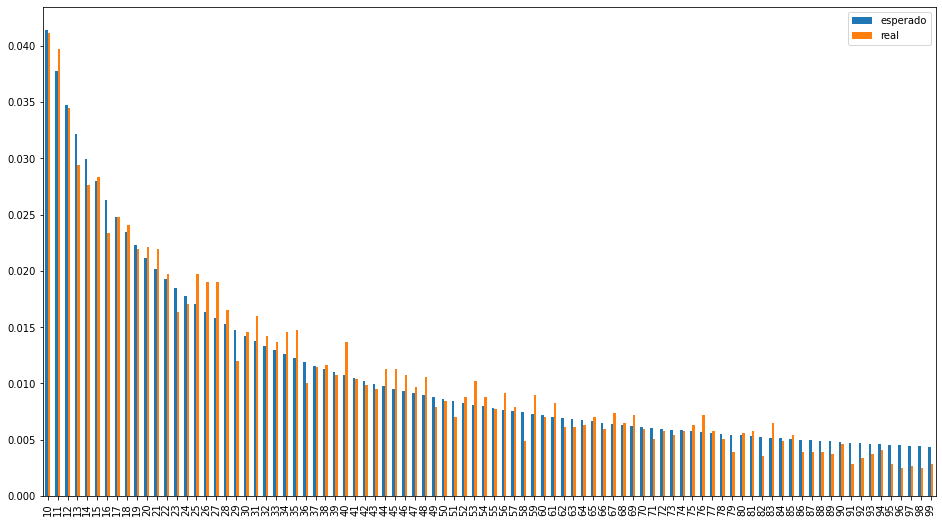

In [24]:
#Comparação da freq. da coluna comment_count com a freq. esperada Benford
benford(df_populacao_est2020_2['pop']).plot.bar(figsize=(16,9));
#plt.savefig('myfig') "remova o '#' para obter e salvar uma umagem do gráfico gerado

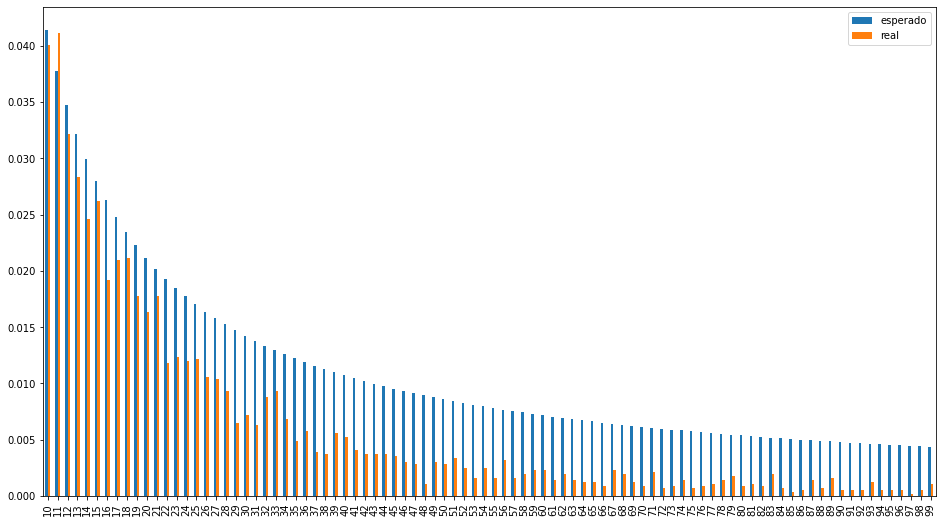

In [25]:
#Comparação da freq. da coluna comment_count com a freq. esperada Benford
benford(df_populacao_est2020[' POPULAÇÃO ESTIMADA ']).plot.bar(figsize=(16,9));


#### Conclusão: Por se tratar de uma base de dados contendo a população estimada, a distribuição resultante se aproxima da Distribuição de Benford, principalmente no primeiro gráfico exibido. 
> ##### Nota: O censo populacional brasileiro acontece a cada 10 anos. O último censo populacional ocorreu em 2010 e teve os dados publicados a partir de 2011.
